In [ ]:
!pip install fracdiff

Venezuela

Interest Rate

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader
import seaborn
import statsmodels.tsa.stattools as stattools
from fracdiff import Fracdiff, FracdiffStat, fdiff
from fracdiff.sklearn import FracdiffStat
from pandas.plotting import register_matplotlib_converters

In [ ]:
df_venezuela = pd.read_excel("IS-data(1)-1.xlsx",parse_dates=['Date'], index_col='Date')
df_VEIN = df_venezuela['Interest Rate ']
df_VEIN.head()

Date
2017-01-01    20.76
2017-02-01    21.78
2017-03-01    22.01
2017-04-01    21.46
2017-05-01    21.56
Name: Interest Rate , dtype: float64

Text(0.5, 1.0, 'Interest Rate')

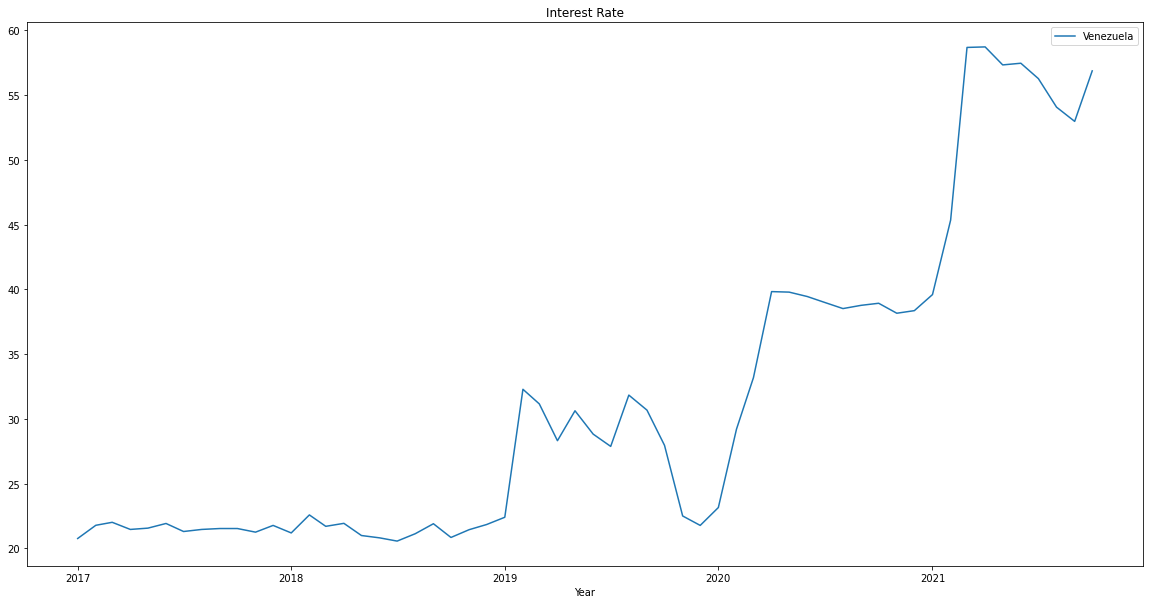

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_VEIN, label = 'Venezuela')
#ax.set_plot(df_sa['Oil Prices'], label = 'Oil')
ax.set_xlabel('Year')
ax.legend()
plt.title("Interest Rate")

In [ ]:
df_differenced = df_VEIN.diff().dropna()
df_differenced

Date
2017-02-01     1.02
2017-03-01     0.23
2017-04-01    -0.55
2017-05-01     0.10
2017-06-01     0.36
2017-07-01    -0.62
2017-08-01     0.16
2017-09-01     0.07
2017-10-01     0.00
2017-11-01    -0.28
2017-12-01     0.52
2018-01-01    -0.58
2018-02-01     1.39
2018-03-01    -0.88
2018-04-01     0.23
2018-05-01    -0.94
2018-06-01    -0.18
2018-07-01    -0.25
2018-08-01     0.57
2018-09-01     0.77
2018-10-01    -1.06
2018-11-01     0.60
2018-12-01     0.40
2019-01-01     0.56
2019-02-01     9.88
2019-03-01    -1.13
2019-04-01    -2.84
2019-05-01     2.31
2019-06-01    -1.80
2019-07-01    -0.95
2019-08-01     3.96
2019-09-01    -1.16
2019-10-01    -2.72
2019-11-01    -5.45
2019-12-01    -0.73
2020-01-01     1.38
2020-02-01     6.05
2020-03-01     3.98
2020-04-01     6.64
2020-05-01    -0.04
2020-06-01    -0.34
2020-07-01    -0.46
2020-08-01    -0.47
2020-09-01     0.25
2020-10-01     0.16
2020-11-01    -0.77
2020-12-01     0.20
2021-01-01     1.24
2021-02-01     5.75
2021-03-01    1

In [ ]:
df_VEIN

Date
2017-01-01    20.76
2017-02-01    21.78
2017-03-01    22.01
2017-04-01    21.46
2017-05-01    21.56
2017-06-01    21.92
2017-07-01    21.30
2017-08-01    21.46
2017-09-01    21.53
2017-10-01    21.53
2017-11-01    21.25
2017-12-01    21.77
2018-01-01    21.19
2018-02-01    22.58
2018-03-01    21.70
2018-04-01    21.93
2018-05-01    20.99
2018-06-01    20.81
2018-07-01    20.56
2018-08-01    21.13
2018-09-01    21.90
2018-10-01    20.84
2018-11-01    21.44
2018-12-01    21.84
2019-01-01    22.40
2019-02-01    32.28
2019-03-01    31.15
2019-04-01    28.31
2019-05-01    30.62
2019-06-01    28.82
2019-07-01    27.87
2019-08-01    31.83
2019-09-01    30.67
2019-10-01    27.95
2019-11-01    22.50
2019-12-01    21.77
2020-01-01    23.15
2020-02-01    29.20
2020-03-01    33.18
2020-04-01    39.82
2020-05-01    39.78
2020-06-01    39.44
2020-07-01    38.98
2020-08-01    38.51
2020-09-01    38.76
2020-10-01    38.92
2020-11-01    38.15
2020-12-01    38.35
2021-01-01    39.59
2021-02-01    4

In [ ]:
X = df_VEIN.values.reshape(-1, 1)

fs = FracdiffStat(mode="valid")

Xdiff = fs.fit_transform(X)
_, pvalue, _, _, _, _ = stattools.adfuller(Xdiff.reshape(-1))
corr = np.corrcoef(X[-Xdiff.size :, 0], Xdiff.reshape(-1))[0][1]

print("* Order: {:.2f}".format(fs.d_[0]))
print("* ADF p-value: {:.2f} %".format(100 * pvalue))
print("* Correlation with the original time-series: {:.2f}".format(corr))

* Order: 0.54
* ADF p-value: 4.99 %
* Correlation with the original time-series: 0.77


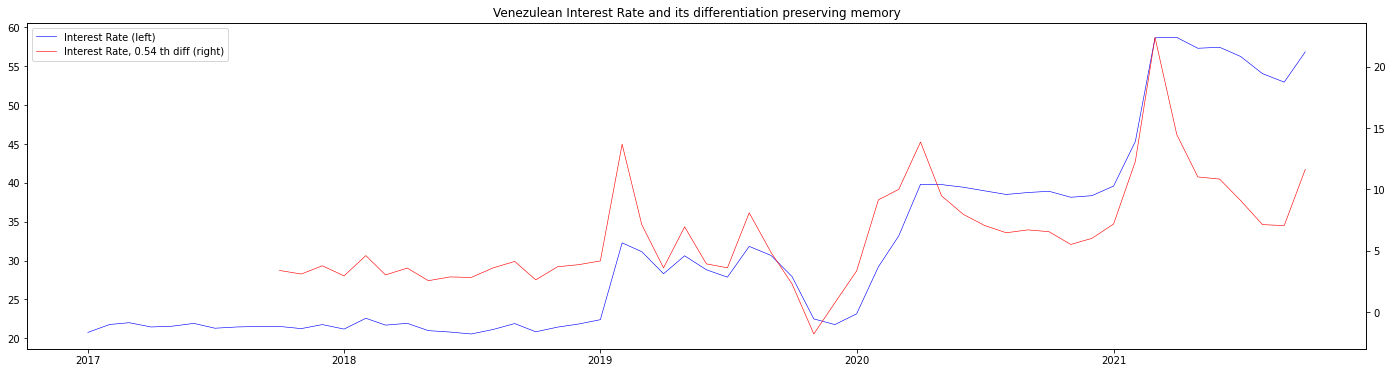

In [ ]:
df_VEIN_diff = pd.Series(Xdiff.reshape(-1), index=df_VEIN.index[-Xdiff.size :])

fig, ax_s = plt.subplots(figsize=(24, 6))
plt.title("Venezulean Interest Rate and its differentiation preserving memory")
ax_d = ax_s.twinx()

plot_s = ax_s.plot(df_VEIN, color="blue", linewidth=0.6, label="Interest Rate (left)")
plot_d = ax_d.plot(
    df_VEIN_diff,
    color="red",
    linewidth=0.6,
    label=f"Interest Rate, {fs.d_[0]:.2f} th diff (right)",
)

plots = plot_s + plot_d

ax_s.legend(plots, [p.get_label() for p in plots], loc=0)
plt.show()

In [ ]:
df_VEIN_diff

Date
2017-10-01     3.387213
2017-11-01     3.095961
2017-12-01     3.768628
2018-01-01     2.947167
2018-02-01     4.601211
2018-03-01     3.023083
2018-04-01     3.580944
2018-05-01     2.553301
2018-06-01     2.861413
2018-07-01     2.814974
2018-08-01     3.591651
2018-09-01     4.123280
2018-10-01     2.621203
2018-11-01     3.687687
2018-12-01     3.858104
2019-01-01     4.165243
2019-02-01    13.681384
2019-03-01     7.118201
2019-04-01     3.600071
2019-05-01     6.941849
2019-06-01     3.924091
2019-07-01     3.603403
2019-08-01     8.085748
2019-09-01     4.868413
2019-10-01     2.293150
2019-11-01    -1.791353
2019-12-01     0.747262
2020-01-01     3.349214
2020-02-01     9.143814
2020-03-01    10.000662
2020-04-01    13.858809
2020-05-01     9.465808
2020-06-01     7.960757
2020-07-01     7.060726
2020-08-01     6.460479
2020-09-01     6.695965
2020-10-01     6.547610
2020-11-01     5.507589
2020-12-01     6.004161
2021-01-01     7.173076
2021-02-01    12.284361
2021-03-01 

In [ ]:
df_VEIN

Date
2017-01-01    20.76
2017-02-01    21.78
2017-03-01    22.01
2017-04-01    21.46
2017-05-01    21.56
2017-06-01    21.92
2017-07-01    21.30
2017-08-01    21.46
2017-09-01    21.53
2017-10-01    21.53
2017-11-01    21.25
2017-12-01    21.77
2018-01-01    21.19
2018-02-01    22.58
2018-03-01    21.70
2018-04-01    21.93
2018-05-01    20.99
2018-06-01    20.81
2018-07-01    20.56
2018-08-01    21.13
2018-09-01    21.90
2018-10-01    20.84
2018-11-01    21.44
2018-12-01    21.84
2019-01-01    22.40
2019-02-01    32.28
2019-03-01    31.15
2019-04-01    28.31
2019-05-01    30.62
2019-06-01    28.82
2019-07-01    27.87
2019-08-01    31.83
2019-09-01    30.67
2019-10-01    27.95
2019-11-01    22.50
2019-12-01    21.77
2020-01-01    23.15
2020-02-01    29.20
2020-03-01    33.18
2020-04-01    39.82
2020-05-01    39.78
2020-06-01    39.44
2020-07-01    38.98
2020-08-01    38.51
2020-09-01    38.76
2020-10-01    38.92
2020-11-01    38.15
2020-12-01    38.35
2021-01-01    39.59
2021-02-01    4

Exchange Rate

In [ ]:
df_venezuela = pd.read_excel("IS-data(1)-1.xlsx",parse_dates=['Date'], index_col='Date')
df_VENEXCH = df_venezuela['Exch Rate ']
df_VENEXCH.head()

Date
2017-01-01    9.975
2017-02-01    9.975
2017-03-01    9.975
2017-04-01    9.975
2017-05-01    9.975
Name: Exch Rate , dtype: float64

Text(0.5, 1.0, 'Exchange Rate')

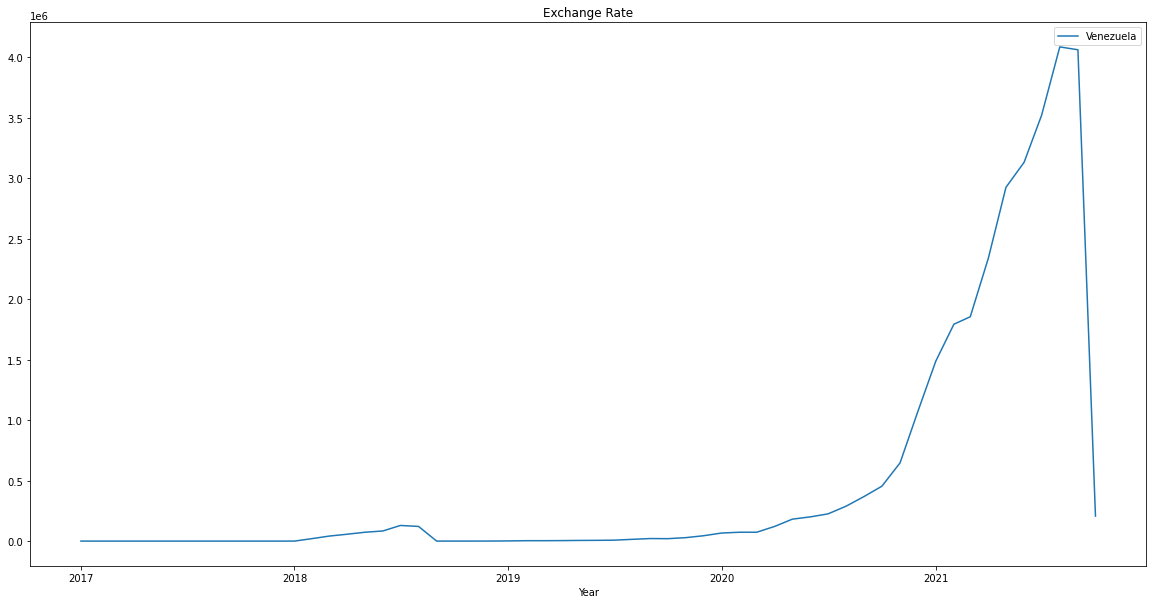

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_VENEXCH, label = 'Venezuela')
#ax.set_plot(df_sa['Oil Prices'], label = 'Oil')
ax.set_xlabel('Year')
ax.legend()
plt.title("Exchange Rate")

In [ ]:
X = df_VENEXCH.values.reshape(-1, 1)

fs = FracdiffStat(mode="valid")

Xdiff = fs.fit_transform(X)
_, pvalue, _, _, _, _ = stattools.adfuller(Xdiff.reshape(-1))
corr = np.corrcoef(X[-Xdiff.size :, 0], Xdiff.reshape(-1))[0][1]

print("* Order: {:.2f}".format(fs.d_[0]))
print("* ADF p-value: {:.2f} %".format(100 * pvalue))
print("* Correlation with the original time-series: {:.2f}".format(corr))

* Order: 0.00
* ADF p-value: 0.00 %
* Correlation with the original time-series: 1.00


Oil Prices

In [ ]:

df_venezuela = pd.read_excel("IS-data(1)-1.xlsx",parse_dates=['Date'], index_col='Date')
df_VOIL= df_venezuela['Oil Prices']
df_VOIL.head()

Date
2017-01-01    49.03
2017-02-01    51.99
2017-03-01    50.34
2017-04-01    44.44
2017-05-01    35.47
Name: Oil Prices, dtype: float64

Text(0.5, 1.0, 'Oil Prices')

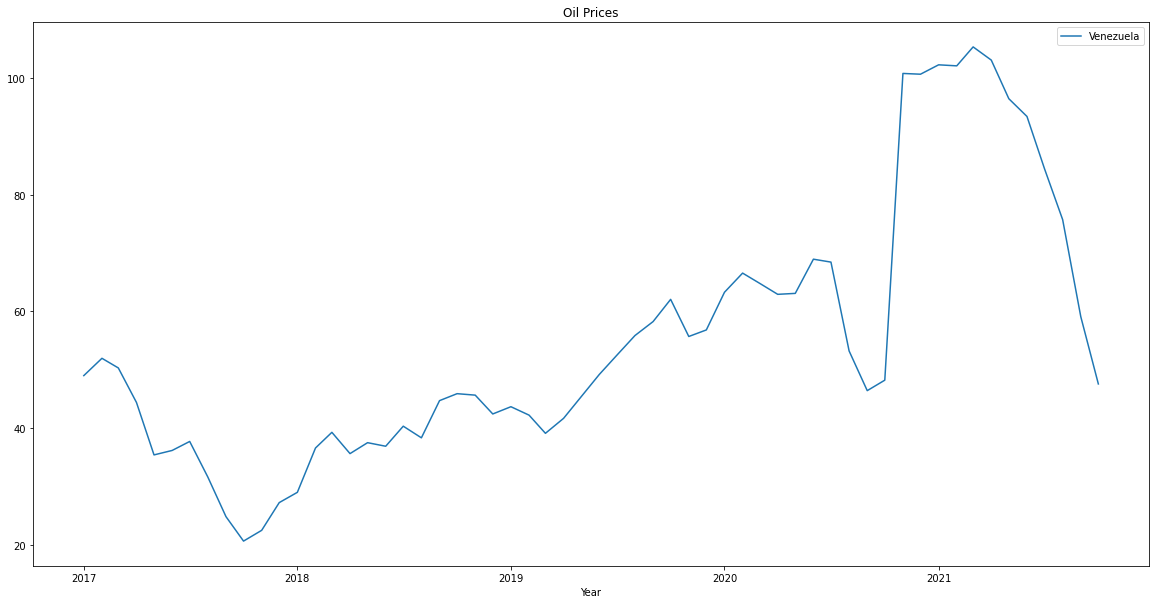

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_VOIL, label = 'Venezuela')
#ax.set_plot(df_sa['Oil Prices'], label = 'Oil')
ax.set_xlabel('Year')
ax.legend()
plt.title("Oil Prices")

In [ ]:
df_differenced = df_VOIL.diff().dropna()
df_differenced

Date
2017-02-01     2.960000
2017-03-01    -1.650000
2017-04-01    -5.900000
2017-05-01    -8.970000
2017-06-01     0.760000
2017-07-01     1.540000
2017-08-01    -6.090000
2017-09-01    -6.770000
2017-10-01    -4.180000
2017-11-01     1.840000
2017-12-01     4.740000
2018-01-01     1.760000
2018-02-01     7.580000
2018-03-01     2.680000
2018-04-01    -3.640000
2018-05-01     1.870000
2018-06-01    -0.610000
2018-07-01     3.430000
2018-08-01    -1.990000
2018-09-01     6.360000
2018-10-01     1.190000
2018-11-01    -0.250000
2018-12-01    -3.220000
2019-01-01     1.240000
2019-02-01    -1.440000
2019-03-01    -3.110000
2019-04-01     2.560000
2019-05-01     3.690000
2019-06-01     3.810000
2019-07-01     3.290000
2019-08-01     3.370000
2019-09-01     2.390000
2019-10-01     3.800000
2019-11-01    -6.350000
2019-12-01     1.120000
2020-01-01     6.440000
2020-02-01     3.280000
2020-03-01    -1.740000
2020-04-01    -1.890000
2020-05-01     0.160000
2020-06-01     5.850000
2020-07-01 

In [ ]:
X = df_VOIL.values.reshape(-1, 1)

fs = FracdiffStat(mode="valid")

Xdiff = fs.fit_transform(X)
_, pvalue, _, _, _, _ = stattools.adfuller(Xdiff.reshape(-1))
corr = np.corrcoef(X[-Xdiff.size :, 0], Xdiff.reshape(-1))[0][1]

print("* Order: {:.2f}".format(fs.d_[0]))
print("* ADF p-value: {:.2f} %".format(100 * pvalue))
print("* Correlation with the original time-series: {:.2f}".format(corr))

* Order: 0.36
* ADF p-value: 4.93 %
* Correlation with the original time-series: 0.82


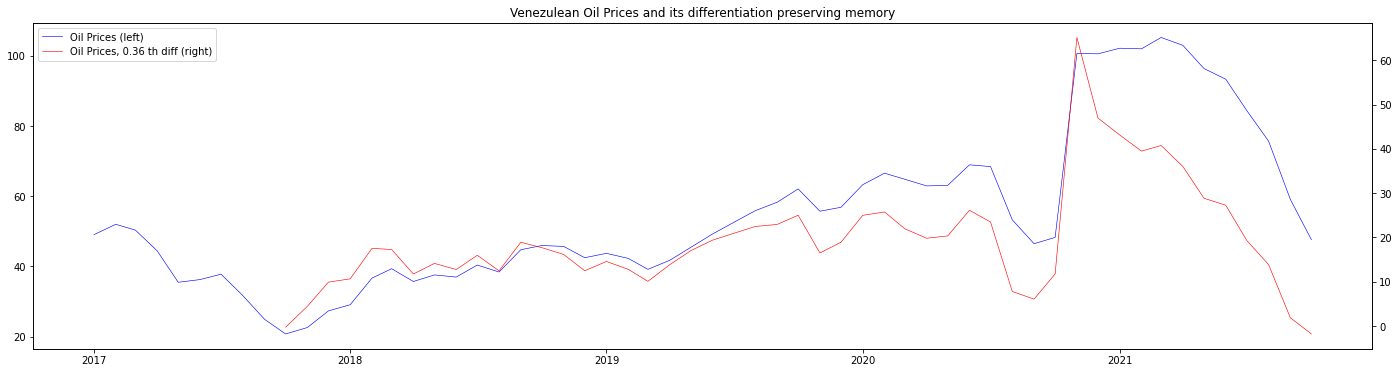

In [ ]:
df_VOIL_diff = pd.Series(Xdiff.reshape(-1), index=df_VEIN.index[-Xdiff.size :])

fig, ax_s = plt.subplots(figsize=(24, 6))
plt.title("Venezulean Oil Prices and its differentiation preserving memory")
ax_d = ax_s.twinx()

plot_s = ax_s.plot(df_VOIL, color="blue", linewidth=0.6, label="Oil Prices (left)")
plot_d = ax_d.plot(
    df_VOIL_diff,
    color="red",
    linewidth=0.6,
    label=f"Oil Prices, {fs.d_[0]:.2f} th diff (right)",
)
plots = plot_s + plot_d

ax_s.legend(plots, [p.get_label() for p in plots], loc=0)
plt.show()

In [ ]:
df_VOIL_diff

Date
2017-10-01    -0.280349
2017-11-01     4.445222
2017-12-01     9.903483
2018-01-01    10.645463
2018-02-01    17.530870
2018-03-01    17.274922
2018-04-01    11.736158
2018-05-01    14.134716
2018-06-01    12.744488
2018-07-01    15.963014
2018-08-01    12.453784
2018-09-01    18.908718
2018-10-01    17.687604
2018-11-01    16.161211
2018-12-01    12.472982
2019-01-01    14.570272
2019-02-01    12.795726
2019-03-01    10.080666
2019-04-01    13.825180
2019-05-01    17.000028
2019-06-01    19.384272
2019-07-01    20.911755
2019-08-01    22.480304
2019-09-01    22.933155
2019-10-01    25.014013
2019-11-01    16.492290
2019-12-01    18.909332
2020-01-01    24.996641
2020-02-01    25.753244
2020-03-01    21.949945
2020-04-01    19.817395
2020-05-01    20.343650
2020-06-01    26.134359
2020-07-01    23.482697
2020-08-01     7.788744
2020-09-01     6.060645
2020-10-01    11.762991
2020-11-01    65.170870
2020-12-01    46.970121
2021-01-01    43.137410
2021-02-01    39.500308
2021-03-01 

In [ ]:
df_VOIL

Date
2017-01-01     49.030000
2017-02-01     51.990000
2017-03-01     50.340000
2017-04-01     44.440000
2017-05-01     35.470000
2017-06-01     36.230000
2017-07-01     37.770000
2017-08-01     31.680000
2017-09-01     24.910000
2017-10-01     20.730000
2017-11-01     22.570000
2017-12-01     27.310000
2018-01-01     29.070000
2018-02-01     36.650000
2018-03-01     39.330000
2018-04-01     35.690000
2018-05-01     37.560000
2018-06-01     36.950000
2018-07-01     40.380000
2018-08-01     38.390000
2018-09-01     44.750000
2018-10-01     45.940000
2018-11-01     45.690000
2018-12-01     42.470000
2019-01-01     43.710000
2019-02-01     42.270000
2019-03-01     39.160000
2019-04-01     41.720000
2019-05-01     45.410000
2019-06-01     49.220000
2019-07-01     52.510000
2019-08-01     55.880000
2019-09-01     58.270000
2019-10-01     62.070000
2019-11-01     55.720000
2019-12-01     56.840000
2020-01-01     63.280000
2020-02-01     66.560000
2020-03-01     64.820000
2020-04-01     62.93

Merging the datasets

In [ ]:
#df_VEIN_diff = df_VEIN_diff.to_frame
df_VEN_diff  = pd.concat([df_VOIL_diff, df_VEIN_diff], axis=1)
df_VEN_diff.head()

,0,1
Date,,
2017-10-01,-0.280349,3.387213
2017-11-01,4.445222,3.095961
2017-12-01,9.903483,3.768628
2018-01-01,10.645463,2.947167
2018-02-01,17.530870,4.601211


In [ ]:
df_VEN_diff.columns =['Oil Prices', 'Interest Rates']

In [ ]:
df_VEN_diff= pd.concat([df_VEN_diff, df_VENEXCH], axis= 1)

In [ ]:
df_VEN_diff

,Oil Prices,Interest Rates,Exch Rate
Date,,,
2017-01-01,NaN,NaN,9.975000e+00
2017-02-01,NaN,NaN,9.975000e+00
2017-03-01,NaN,NaN,9.975000e+00
2017-04-01,NaN,NaN,9.975000e+00
2017-05-01,NaN,NaN,9.975000e+00
2017-06-01,NaN,NaN,9.975000e+00
2017-07-01,NaN,NaN,9.975000e+00
2017-08-01,NaN,NaN,9.975000e+00
2017-09-01,NaN,NaN,9.975000e+00


In [ ]:
df_VEN_diff.dropna(subset = ["Oil Prices", "Interest Rates"], inplace=True)

In [ ]:
df_VEN_diff

,Oil Prices,Interest Rates,Exch Rate
Date,,,
2017-10-01,-0.280349,3.387213,9.975000e+00
2017-11-01,4.445222,3.095961,9.975000e+00
2017-12-01,9.903483,3.768628,9.975000e+00
2018-01-01,10.645463,2.947167,9.975000e+00
2018-02-01,17.530870,4.601211,2.108978e+04
2018-03-01,17.274922,3.023083,4.127326e+04
2018-04-01,11.736158,3.580944,5.681356e+04
2018-05-01,14.134716,2.553301,7.298753e+04
2018-06-01,12.744488,2.861413,8.360000e+04


In [ ]:
df_VEN_diff.columns =['Oil Prices', 'Interest Rates', 'Exchange Rate']
df_VEN_diff

,Oil Prices,Interest Rates,Exchange Rate
Date,,,
2017-10-01,-0.280349,3.387213,9.975000e+00
2017-11-01,4.445222,3.095961,9.975000e+00
2017-12-01,9.903483,3.768628,9.975000e+00
2018-01-01,10.645463,2.947167,9.975000e+00
2018-02-01,17.530870,4.601211,2.108978e+04
2018-03-01,17.274922,3.023083,4.127326e+04
2018-04-01,11.736158,3.580944,5.681356e+04
2018-05-01,14.134716,2.553301,7.298753e+04
2018-06-01,12.744488,2.861413,8.360000e+04


VAR Model

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

model = VAR(df_VEN_diff)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  33.07454648594491
BIC :  33.54234673867188
FPE :  231524945579945.2
HQIC:  33.25132888476114 

Lag Order = 2
AIC :  32.834309534077995
BIC :  33.66097122845908
FPE :  183091343702321.9
HQIC:  33.14538788297577 

Lag Order = 3
AIC :  32.95379513293563
BIC :  34.146387348037216
FPE :  209332615312263.38
HQIC:  33.400547324453306 

Lag Order = 4
AIC :  32.56943057293478
BIC :  34.13520473073572
FPE :  146818546523012.78
HQIC:  33.1531354579897 

Lag Order = 5
AIC :  32.54904352937772
BIC :  34.49543222092492
FPE :  151809187640609.22
HQIC:  33.2708582885176 

Lag Order = 6
AIC :  32.65863270895621
BIC :  34.99324681580582
FPE :  185617938377289.78
HQIC:  33.51956623976041 

Lag Order = 7
AIC :  32.539394563359075
BIC :  35.27001824923293
FPE :  191515497835377.47
HQIC:  33.54027614209011 

Lag Order = 8
AIC :  30.869438813460874
BIC :  34.00402186231022
FPE :  46112274446035.6
HQIC:  32.010881135235515 

Lag Order = 9
AIC :  30.20695186476581
BIC :  33.75359871840507


In [ ]:
x = model.select_order(maxlags=5)
x.summary()

,AIC,BIC,FPE,HQIC
0,35.73,35.85,3.294e+15,35.78
1,33.34,33.83*,3.032e+14,33.52
2,33.07,33.93,2.330e+14,33.39
3,33.10,34.32,2.429e+14,33.55
4,32.65,34.23,1.602e+14,33.24*
5,32.55*,34.50,1.518e+14*,33.27


In [ ]:
results = VAR(df_VEN_diff).fit(8)
results.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 01, Apr, 2022
Time:                     16:19:51
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    34.0040
Nobs:                     41.0000    HQIC:                   32.0109
Log likelihood:          -732.353    FPE:                4.61123e+13
AIC:                      30.8694    Det(Omega_mle):     1.10544e+13
--------------------------------------------------------------------
Results for equation Oil Prices
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    16.315774        10.612230            1.537           0.124
L1.Oil Prices             0.238293         0.238707            0.998           0.318
L1.Interest Rates        -0.348325     

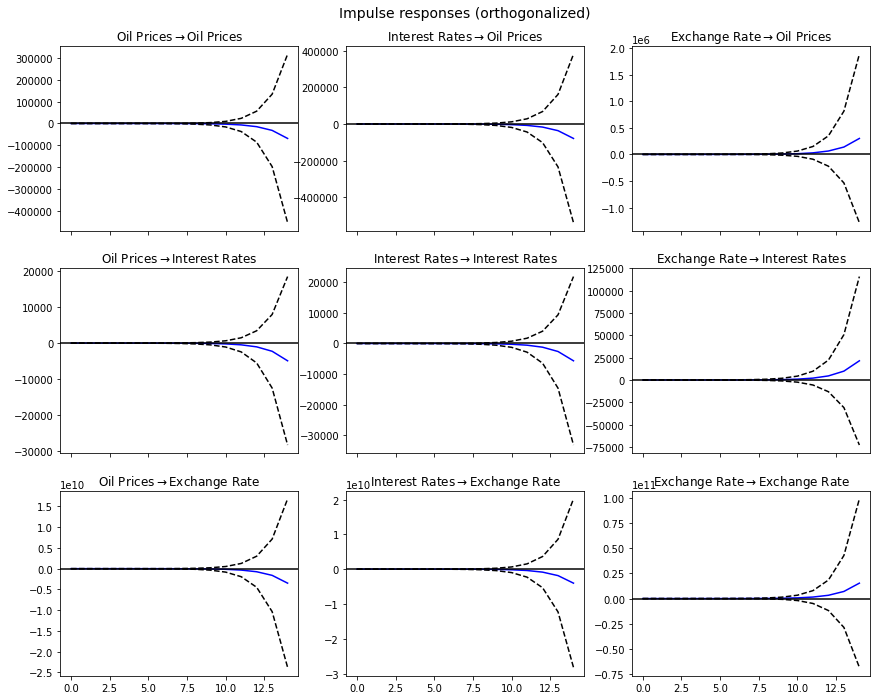

In [ ]:
irf = results.irf(14)
irf.plot(orth=True, figsize = (12.5,10))

In [ ]:
irf = results.irf(14)
irf.plot(orth=True, figsize = (12.5,10), impulse = ('Oil Prices'), response = ('Exchange Rate'))
plt.ylim([ -2500000,2500000])